In [24]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
bnb_ticker = yf.Ticker("BNB-USD")
csv_file = "bnb.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Binance Coin
bnb = bnb_ticker.history(period="max")
bnb.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
bnb = pd.read_csv(csv_file, index_col=0)
bnb

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.0,0.0
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.0,0.0
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.0,0.0
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.0,0.0
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,603.114197,609.050476,601.585938,607.802917,1471028668,0.0,0.0
2024-06-16 00:00:00+00:00,607.808472,611.197510,601.476929,610.054016,1428836675,0.0,0.0
2024-06-17 00:00:00+00:00,610.073669,611.944031,592.426147,604.467346,1797626078,0.0,0.0


<Axes: xlabel='Date'>

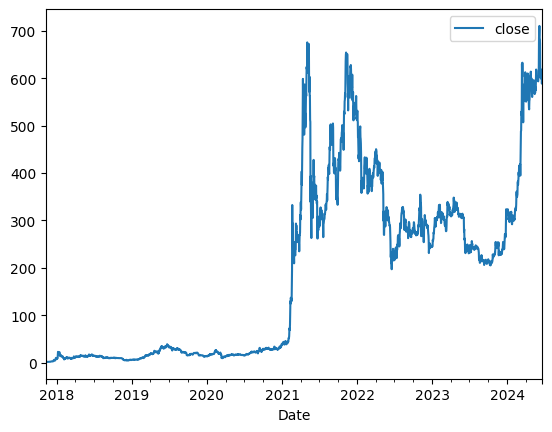

In [26]:
# Convert index to datetime
bnb.index = pd.to_datetime(bnb.index)

# Remove unnecessary columns
del bnb["Dividends"]
del bnb["Stock Splits"]

# Convert column names to lowercase
bnb.columns = [c.lower() for c in bnb.columns]

# Plot the closing price
bnb.plot.line(y="close", use_index=True)

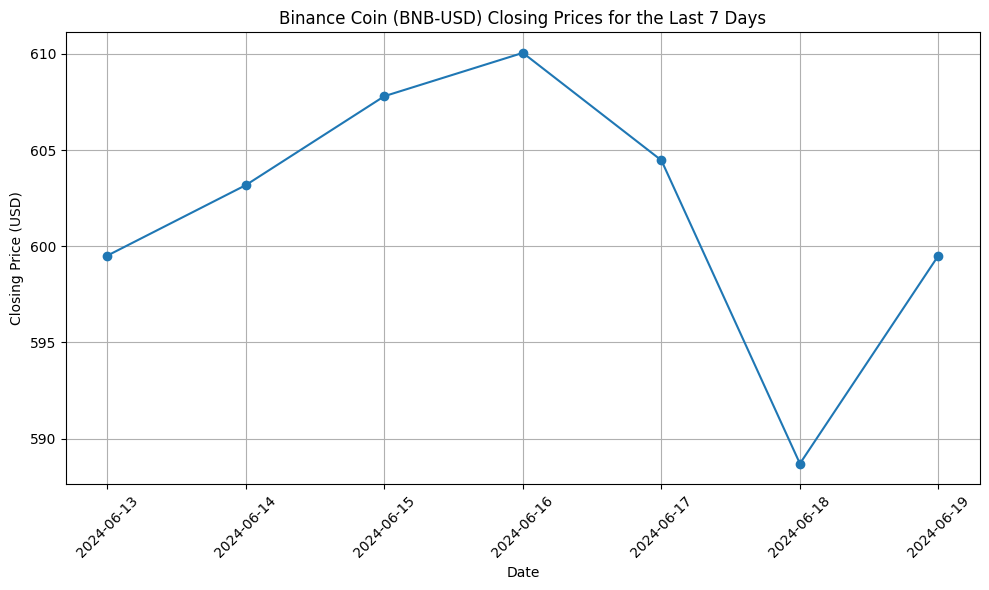

In [27]:
# Filter the data for the last seven days
last_seven_days_bnb = bnb[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_bnb.index, last_seven_days_bnb['close'], marker='o')
plt.title('Binance Coin (BNB-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
wiki = pd.read_csv("binance_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.000000,0.000000,0.000000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-06-15,0.233333,-0.056096,0.094444
2024-06-16,0.233333,-0.056096,0.094444
2024-06-17,0.233333,-0.056096,0.094444
2024-06-18,0.166667,-0.055640,0.077778


In [29]:
# Assuming 'btc' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
bnb = bnb.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
bnb["tomorrow"] = bnb["close"].shift(-1)
bnb["target"] = (bnb["tomorrow"] > bnb["close"]).astype(int)
bnb["target"].value_counts()


target
1    1254
0    1161
Name: count, dtype: int64

In [30]:
bnb

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.000000,0.000000,0.000000,1.796840,0
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.000000,0.000000,0.000000,1.670470,0
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.000000,0.000000,0.000000,1.519690,0
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.000000,0.000000,0.000000,1.686620,1
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.000000,0.000000,0.000000,1.592580,0
...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,603.114197,609.050476,601.585938,607.802917,1471028668,0.233333,-0.056096,0.094444,610.054016,1
2024-06-16 00:00:00+00:00,607.808472,611.197510,601.476929,610.054016,1428836675,0.233333,-0.056096,0.094444,604.467346,0
2024-06-17 00:00:00+00:00,610.073669,611.944031,592.426147,604.467346,1797626078,0.233333,-0.056096,0.094444,588.702087,0
2024-06-18 00:00:00+00:00,604.332886,604.652832,575.761719,588.702087,2265505402,0.166667,-0.055640,0.077778,599.520142,1


In [31]:
bnb.to_csv('bnbSentiment.csv')

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = bnb.iloc[:-200]
test = bnb.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [33]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.6304347826086957

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [35]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [36]:
preds

2023-12-03 00:00:00+00:00    1
2023-12-04 00:00:00+00:00    1
2023-12-05 00:00:00+00:00    1
2023-12-06 00:00:00+00:00    1
2023-12-07 00:00:00+00:00    1
                            ..
2024-06-15 00:00:00+00:00    0
2024-06-16 00:00:00+00:00    0
2024-06-17 00:00:00+00:00    0
2024-06-18 00:00:00+00:00    0
2024-06-19 00:00:00+00:00    0
Length: 200, dtype: int32

In [37]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(bnb, model, predictors)

In [38]:
predictions["predictions"].value_counts()

predictions
0    721
1    599
Name: count, dtype: int64

In [39]:
precision_score(predictions["target"], predictions["predictions"])

0.5258764607679466

In [40]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [41]:
bnb, new_predictors = compute_rolling(bnb.copy())
bnb

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.000000,0.000000,0.000000,1.796840,0,...,NaN,1.000000,0.000000,NaN,1.000000,0.000000,NaN,1.000000,0.000000,NaN
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.000000,0.000000,0.000000,1.670470,0,...,0.0,0.948799,0.000000,0.000000,0.948799,0.000000,0.000000,0.948799,0.000000,0.000000
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.000000,0.000000,0.000000,1.519690,0,...,0.0,0.918164,0.000000,0.000000,0.918164,0.000000,0.000000,0.918164,0.000000,0.000000
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.000000,0.000000,0.000000,1.686620,1,...,0.0,0.871161,0.000000,0.000000,0.871161,0.000000,0.000000,0.871161,0.000000,0.000000
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.000000,0.000000,0.000000,1.592580,0,...,0.5,0.973306,0.000000,0.250000,0.973306,0.000000,0.250000,0.973306,0.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-15 00:00:00+00:00,603.114197,609.050476,601.585938,607.802917,1471028668,0.233333,-0.056096,0.094444,610.054016,1,...,1.0,0.982602,0.309524,0.428571,1.010433,0.671667,0.533333,1.736723,0.412511,0.542466
2024-06-16 00:00:00+00:00,607.808472,611.197510,601.476929,610.054016,1428836675,0.233333,-0.056096,0.094444,604.467346,0,...,1.0,1.000864,0.290476,0.571429,1.012054,0.666667,0.550000,1.738182,0.411233,0.542466
2024-06-17 00:00:00+00:00,610.073669,611.944031,592.426147,604.467346,1797626078,0.233333,-0.056096,0.094444,588.702087,0,...,0.5,0.996350,0.276190,0.571429,1.001338,0.662222,0.533333,1.717433,0.410046,0.542466
2024-06-18 00:00:00+00:00,604.332886,604.652832,575.761719,588.702087,2265505402,0.166667,-0.055640,0.077778,599.520142,1,...,0.0,0.973540,0.252381,0.571429,0.974313,0.658333,0.516667,1.668150,0.408493,0.542466


In [42]:
predictions = backtest(bnb, model, new_predictors)
precision_score(predictions["target"], predictions["predictions"])

0.5070671378091873

In [43]:
predictions

,target,predictions
2020-11-08 00:00:00+00:00,0,1
2020-11-09 00:00:00+00:00,1,1
2020-11-10 00:00:00+00:00,0,1
2020-11-11 00:00:00+00:00,0,1
2020-11-12 00:00:00+00:00,1,0
...,...,...
2024-06-15 00:00:00+00:00,1,0
2024-06-16 00:00:00+00:00,0,0
2024-06-17 00:00:00+00:00,0,0
2024-06-18 00:00:00+00:00,1,0


In [44]:
prob_inc = (predictions["predictions"] == 1).mean()
prob_dec = 1 - prob_inc
print(f"Probability of increase: {prob_inc:.2f}")
print(f"Probability of decrease: {prob_dec:.2f}")

Probability of increase: 0.43
Probability of decrease: 0.57
